# Fatal Police Shootings in USA (2015 - 2021)

## 1. Introducción
Estados Unidos es un país cuya discusión acerca de la brutalidad con la que la policía ejerce su oficio es fruto de innumerables protestas y conflictos. Entre esta brutalidad policial destaca la alta tasa de tiroteos por parte del cuerpo que acaban con víctimas mortales. Una investigación de The Washington Post mostró que el FBI en sus reportes subestima en gran medida estos sucesos debido a que el reporte de estos los realiza los departamentos de policía de manera voluntaria, hecho que no sucede tan habitualmente como debería. Tras esta investigación en 2015, The Washington Post decide comenzar a registrar todos estos casos a partir de noticias, redes sociales e informes policiales. Para llevar a cabo este análisis utilizaremos este conjunto de datos, además de otro añadido con información sobre la población de Estados Unidos.
<br><br>
Este conjunto de datos lo podemos encontrar en el repositorio de GitHub de The Washington Post: https://github.com/washingtonpost/data-police-shootings
<p id="data"></p>

El dataset acerca de la población estadounidense lo podemos encontrar alojado en la web de USAFacts en el siguiente enlace: https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/

## 2. Tratamiento de datos
Lo primero que haremos será realizar un pequeño análisis de la información de nuestro dataset para poder hacernos una ida del tipo de contenido que tenemos.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
shootings = pd.read_csv("data-police-shootings/fatal-police-shootings-data.csv", sep = ",", parse_dates=['date'])
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Vemos la cantidad de observaciones que tenemos de nuestros datos.
<br> También, visualizamos los tipos de las variables.

In [3]:
shootings.shape

(6810, 17)

In [4]:
shootings.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

Analizamos el porcentaje de observaciones con valores nulos que contiene nuestro dataset y características generales de nuestras variables numéricas. Si el porcentaje de valores nulos de una variable fuese demasiado alto, podríamos descartar esa variable al sernos inútil.

In [5]:
# porcentaje missing values
shootings.isna().mean() * 100

id                          0.000000
name                        4.199706
date                        0.000000
manner_of_death             0.000000
armed                       3.024963
age                         5.022026
gender                      0.117474
race                       14.023495
city                        0.000000
state                       0.000000
signs_of_mental_illness     0.000000
threat_level                0.000000
flee                        7.973568
body_camera                 0.000000
longitude                   5.800294
latitude                    5.800294
is_geocoding_exact          0.000000
dtype: float64

In [6]:
shootings.describe()

,id,age,longitude,latitude
count,6810.000000,6468.000000,6415.000000,6415.000000
mean,3768.173421,37.142393,-97.111723,36.661462
std,2127.512395,12.980090,16.636107,5.387413
min,3.000000,6.000000,-160.007000,19.498000
25%,1919.250000,27.000000,-112.075500,33.478000
50%,3777.000000,35.000000,-94.249000,36.100000
75%,5615.750000,45.000000,-83.108500,40.000000
max,7432.000000,92.000000,-67.867000,71.301000


A partir de aquí, haremos un pequeño tratamiento de datos con objetivo de hacerlos más accesibles tanto como para entenderlos como para utilizarlos a la hora de crear gráficos.
<br>
Primero, crearemos una variable booleana que nos indique si la víctima estaba armada o no, ya que en la variable original nos indican todos los tipos de armas utilizados.

In [7]:
shootings['armed_boolean'] = shootings['armed'] == 'unarmed'

En el dataset original, las razas, géneros y estados de las víctimas vienen indicadas por siglas. Les pondremos el nombre original de estas variables.
<br>
La información para realizar esta conversión la encontramos en el README del dataset, a excepción de los nombres de los estados, que con una busqueda rápida en Internet se encuentran.

In [8]:
shootings['race'] = shootings['race'].map({'W': 'White', 
                                           'B': 'Black', 
                                           'A': 'Asian', 
                                           'N': 'Native American', 
                                           'H': 'Hispanic', 
                                           'O': 'Other'})

In [9]:
shootings['gender'] = shootings['gender'].map({'F': 'Female', 
                                               'M': 'Male'})

In [10]:
shootings['state'] = shootings['state'].map({   'AL': 'Alabama',
                                                'AK': 'Alaska',
                                                'AZ': 'Arizona',
                                                'AR': 'Arkansas',
                                                'CA': 'California',
                                                'CO': 'Colorado',
                                                'CT': 'Connecticut',
                                                'DE': 'Delaware',
                                                'DC': 'Washington D.C.',
                                                'FL': 'Florida',
                                                'GA': 'Georgia',
                                                'HI': 'Hawaii',
                                                'ID': 'Idaho',
                                                'IL': 'Illinois',
                                                'IN': 'Indiana',
                                                'IA': 'Iowa',
                                                'KS': 'Kansas',
                                                'KY': 'Kentucky',
                                                'LA': 'Louisiana',
                                                'ME': 'Maine',
                                                'MD': 'Maryland',
                                                'MA': 'Massachusetts',
                                                'MI': 'Michigan',
                                                'MN': 'Minnesota',
                                                'MS': 'Mississippi',
                                                'MO': 'Missouri',
                                                'MT': 'Montana',
                                                'NE': 'Nebraska',
                                                'NV': 'Nevada',
                                                'NH': 'New Hampshire',
                                                'NJ': 'New Jersey',
                                                'NM': 'New Mexico',
                                                'NY': 'New York',
                                                'NC': 'North Carolina',
                                                'ND': 'North Dakota',
                                                'OH': 'Ohio',
                                                'OK': 'Oklahoma',
                                                'OR': 'Oregon',
                                                'PA': 'Pennsylvania',
                                                'RI': 'Rhode Island',
                                                'SC': 'South Carolina',
                                                'SD': 'South Dakota',
                                                'TN': 'Tennessee',
                                                'TX': 'Texas',
                                                'UT': 'Utah',
                                                'VT': 'Vermont',
                                                'VA': 'Virginia',
                                                'WA': 'Washington',
                                                'WV': 'West Virginia',
                                                'WI': 'Wisconsin',
                                                'WY': 'Wyoming'})

También, extraeremos como variables el día del año y el año de la fecha de la muertes.
<br>
Tras esto, podemos ver el resultado del tratamiento de nuestro dataset.

In [11]:
shootings['date_year'] = shootings['date'].dt.year.astype('category')
shootings['date_day'] = shootings['date'].dt.dayofyear

In [12]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,armed_boolean,date_year,date_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,True,attack,Not fleeing,False,-123.122,47.247,True,False,2015,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,False,attack,Not fleeing,False,-122.892,45.487,True,False,2015,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,False,other,Not fleeing,False,-97.281,37.695,True,True,2015,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,True,attack,Not fleeing,False,-122.422,37.763,True,False,2015,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,False,attack,Not fleeing,False,-104.692,40.384,True,False,2015,4


## 3. Gráficas

La primera gráfica que veremos nos da información sobre la concentración de tiroteos con víctimas formando el mapa de Estados Unidos. Lo analizaremos desglosado por razas para hacernos una idea general de la cantidad de muertes según esta característica.
<br>
Podemos ver que la mayoría de puntos del mapa son correspondientes a víctumas cuya raza era blanca, aunque en zonas como en el oeste destacan las víctimas hispanas al igual que en el  este, las de raza negra. Podemos mencionar, también la aparición de puntos en zonas más alejadas representando los datos provenientes de Hawaii y Alaska.

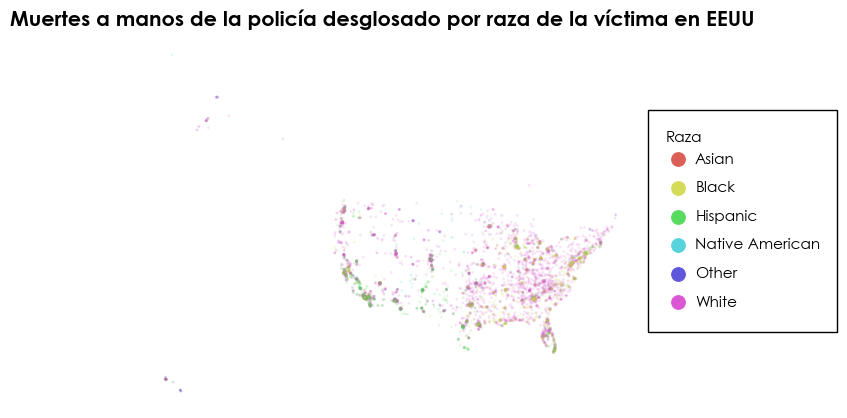

<ggplot: (128354036616)>

In [13]:
shootings_aux_1 = shootings[(shootings.race.isna() == False) & 
                          ((shootings.latitude.isna() == False) | (shootings.longitude.isna() == False))]

(ggplot(shootings_aux_1)
 + geom_point(aes(x = 'longitude', y = 'latitude', color = 'race'), 
              size = 0.2, 
              alpha = 0.1)
 + scale_color_hue(name="Raza")
 + ggtitle("Muertes a manos de la policía desglosado por raza de la víctima en EEUU")
 + guides(colour = guide_legend(override_aes = {'size':5, 'alpha':1}))
 + theme(
    panel_background=element_blank(),
     
    axis_title = element_blank(),
    axis_text = element_blank(),
    axis_ticks = element_blank(),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11)
 )
 
)

En la siguiente gráfica, podemos ver la acumulación de casos por estado en el que sucedieron los hechos. Destacan California, Florida y Texas, que coincide exactamente con los estados más poblados de USA, así que no nos sorprende esta estadística. Sin embargo, sí que es verdad que estos tres estados o Georgia sí que tienen demasiada concentración respecto a su población total comparado con otros estados, aunque es una estadística que no vamos a estudiar en este análisis.

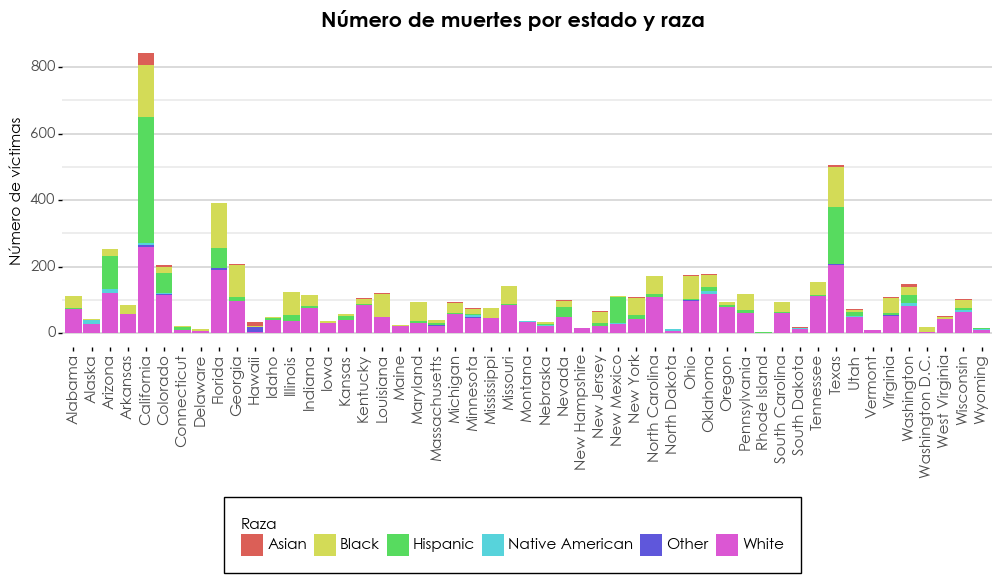

<ggplot: (128354641809)>

In [14]:
shootings_aux_2 = shootings[~shootings.race.isna()]

(ggplot(shootings_aux_2)
 + geom_bar(aes(x = 'state', fill = 'race'), width=0.9)
 + scale_fill_hue(name="Raza")
 + xlab('')
 + ylab("Número de víctimas")
 + ggtitle("Número de muertes por estado y raza")
 + guides(fill = guide_legend(nrow = 1))
 + theme(
    figure_size = (12,4),
     
    panel_background=element_blank(),

    axis_text_x = element_text(angle=90),
    panel_grid_major_y=element_line(color='black', size=0.2),
    panel_grid_minor_y=element_line(color='black', size=0.1),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    legend_position = 'bottom',
    legend_box_spacing=1.5,
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11)
 )
)

Derivado del gráfico anterior, podemos ver los porcentajes de las razas de las víctimas, en el que destaca claramente la raza blanca.
<br>
También, en estados como Loussiana, Illinois o en la capital, Washington D.C., sobresalen las víctimas negras, al igual que en estados como Nuevo México o California las hispanas.
<br> Mencion a parte, también a los porcentajes de razas como asíáticas u otras en Hawaii.
<br> Todas estos porcentajes tienen todo el sentido del mundo si nos hacemos una idea de las poblaciones mayoritarias o de la cantidad de inmigrantes con estos origenes en estos lugares.

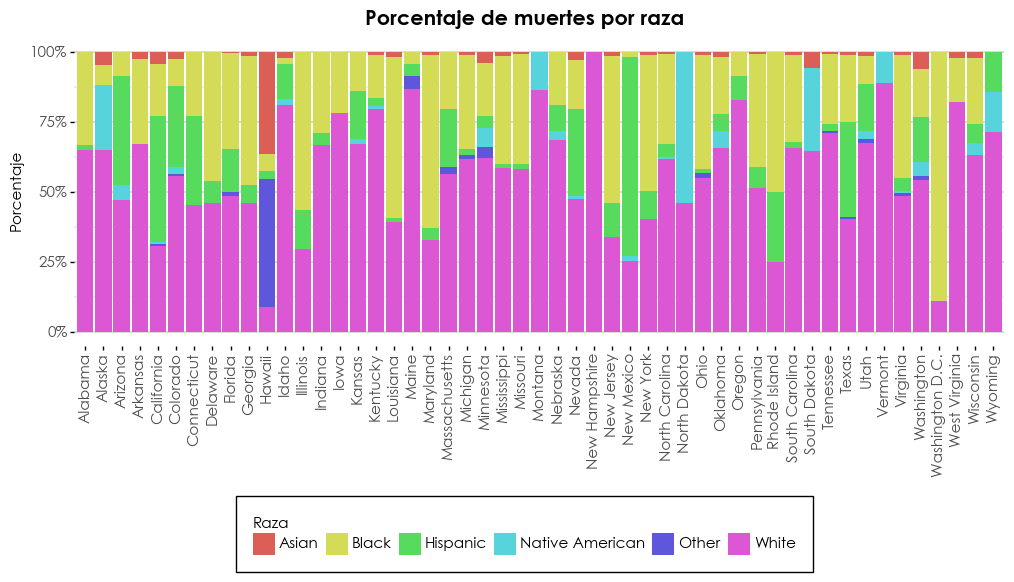

<ggplot: (128354639969)>

In [15]:
(ggplot(shootings_aux_2)
 + geom_bar(aes(x = 'state', fill = 'race'), position = 'fill')
 + scale_fill_hue(name="Raza")
 + xlab("")
 + ylab("Porcentaje")
 + ggtitle("Porcentaje de muertes por raza")
 + guides(fill = guide_legend(nrow = 1))
 + scale_y_continuous(labels = lambda labels: ["%d%%" % (number * 100) for number in labels])
 + theme(
    figure_size = (12,4),
     
    panel_background=element_blank(),

    axis_text_x = element_text(angle=90),
    panel_grid_major_y=element_line(color='black', size=0.2),
    panel_grid_minor_y=element_line(color='black', size=0.1),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    legend_position = 'bottom',
    legend_box_spacing=1.5,
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11)
 )
)

Para el siguiente gráfico, nos mostraremos las porporciones que existen entre la población total de habitantes por razas y los asesinatos que ha habido de estas.
<br> Para ello, nos hará falta utilizar un nuevo dataset con información de la población de USA. Este dataset lo hemos obtenido de la fuente citada en el <a href="#data">punto 1</a> al inicio de este análisis.
<br> Tras pasar por un prepocesado externo nos hemos quedado con dos variables: La raza y etnia, y la población del país en 2019.
<br> Para utilizar esta información y poder combinarla con la que disponemos sobre tiroteos, haremos algunas transformaciones para tener datos similares en cuanto a razas.

In [16]:
population = pd.read_csv("population_usa_2019.csv", sep = ";")
population

,Race and ethnicity,2019
0,Hispanic (People),60572237
1,"White, non-Hispanic (People)",197309822
2,"Black, non-Hispanic (People)",41147488
3,"Asian, non-Hispanic (People)",18905879
4,"Native Hawaiian or other Pacific Islander, non...",595908
5,"American Indian and Alaska Native, non-Hispani...",2434908
6,"Two or more races, non-Hispanic (People)",7273281


In [17]:
population = population.rename(columns={"Race and ethnicity": "race", "2019": "population"})
population['race'] = population['race'].map({
                                           'Hispanic (People)': 'Hispanic',
                                           'White, non-Hispanic (People)': 'White', 
                                           'Black, non-Hispanic (People)': 'Black', 
                                           'Asian, non-Hispanic (People)': 'Asian', 
                                           'Native Hawaiian or other Pacific Islander, non-Hispanic (People)': 'Other', 
                                           'American Indian and Alaska Native, non-Hispanic (People)': 'Native American', 
                                           'Two or more races, non-Hispanic (People)': 'Other'})
population = population.groupby(['race'])['population'].sum()
population = population.reset_index(name='population')
population

,race,population
0,Asian,18905879
1,Black,41147488
2,Hispanic,60572237
3,Native American,2434908
4,Other,7869189
5,White,197309822


En el gráfico que vemos a continuación podemos ver la población total de las razas por millon de habitantes y las víctimas por millón de cada una de ellas.
<br>
En gráficos anteriores habíamos visto que la mayoría de víctimas eran de raza blanca. Esto es totalmente entendible ya que, como vemos, la mayoría del país pertenece a ésta.
Sin embargo, una vez que analizamos las proporciones podemos ver que existen más asesinatos a hispanos, negros y nativos americanos.

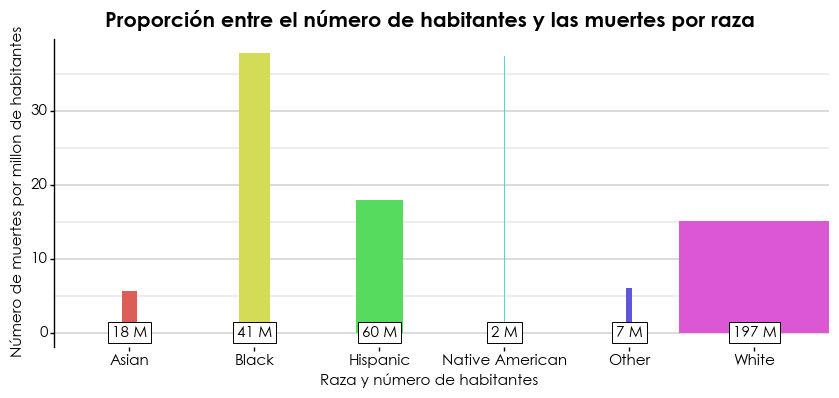

<ggplot: (128355984400)>

In [18]:
shootings_aux_3 = shootings
shootings_counts_3 = shootings_aux_3.groupby(['race'])['id'].count()
shootings_counts_3 = shootings_counts_3.reset_index(name='counts')
shoootings_and_population = shootings_counts_3.merge(population)
shoootings_and_population['proportion_per_million'] = shoootings_and_population['counts']/(shoootings_and_population['population']/1000000)
shoootings_and_population['population_percent'] = shoootings_and_population['population']/shoootings_and_population['population'].sum()

(ggplot(shoootings_and_population)
 + geom_col(aes(x = 'race', y='proportion_per_million', width = 'population_percent * 2', fill='race'))
 + geom_label(aes(x = 'race', 
                  label=["%d M" % (number / 1000000) for number in shoootings_and_population['population']]), 
              y=0,
             boxstyle='square')
 + xlab("Raza y número de habitantes")
 + ylab("Número de muertes por millon de habitantes")
 + ggtitle("Proporción entre el número de habitantes y las muertes por raza")
 + scale_fill_hue()
 + guides(fill = None)
 + theme(
    figure_size = (10,4),
     
    panel_background=element_blank(),
     
    axis_text_x=element_text(colour="black"),
    axis_text_y=element_text(colour="black"),
    axis_line_y=element_line(size=1, colour="black"),

    panel_grid_major_y=element_line(color='black', size=0.2),
    panel_grid_minor_y=element_line(color='black', size=0.1),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11)
 )
)

A continuación, veremos la distribución de las víctimas por edad y sexo.
<br> Podemos ver sin ningún tipo de dificultad que la mayoría de los asesinados se encuentran en un rango de edad entre, más o menos, de los 20 a los 40 años y además, son hombres en su inmensa mayoría.
<br> Podemos mencionar que parece que la edad de las víctimas de raza blanca está más distribuida, mientras que los de raza negra, por ejemplo, suelen ser más jóvenes.

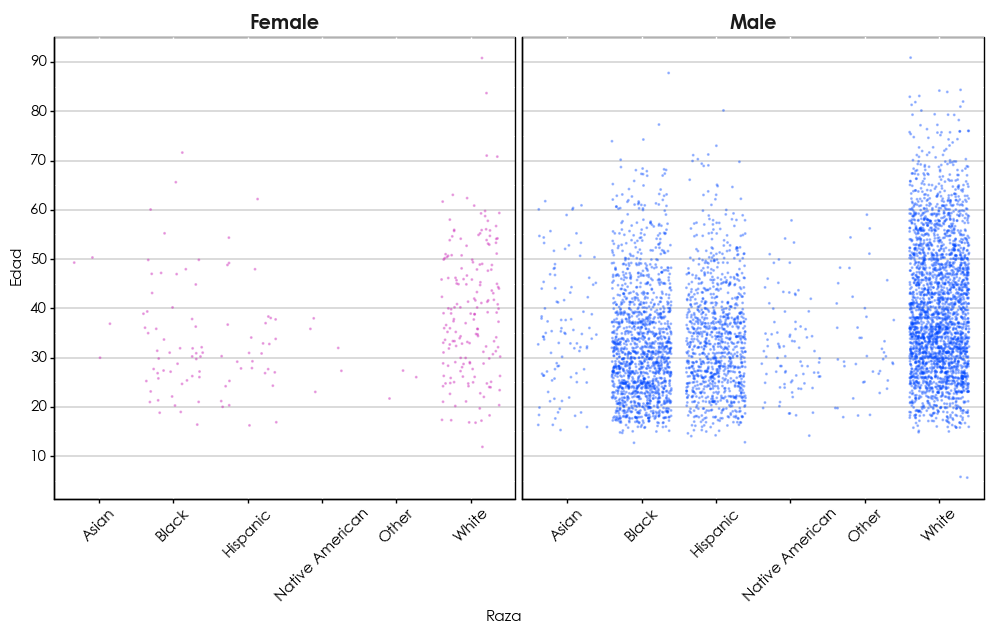

<ggplot: (128356066440)>

In [19]:
shootings_aux_4 = shootings[~(shootings.race.isna()) & 
                          ~(shootings.gender.isna()) &
                          ~(shootings.age.isna())]

(ggplot(shootings_aux_4)
 + geom_jitter(aes(x = 'race', y='age', color='gender', na_rm = True), size=0.2, alpha = 0.3)
 + facet_grid('. ~ gender')
 + scale_y_continuous(breaks = np.arange(0, 101, 10), name = "Edad")
 + scale_x_discrete(name="Raza")
 + scale_color_manual(['#c714b2', '#0048ff'], name = "Género")
 + guides(colour = None)
 + theme(
    figure_size = (12,6),
     
    panel_background=element_blank(),
    panel_border = element_rect(color = "black", fill = 'white', size = 1), 

    axis_text_x = element_text(angle=45, colour="black"),
    axis_text_y=element_text(colour="black"),
    axis_line_x=element_line(size=1, colour="black"),
    axis_line_y=element_line(size=1, colour="black"),
    panel_grid_major_y=element_line(color='black', size=0.2),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11),
    
    strip_background = element_blank(),
    strip_text = element_text(size=14, face="bold")
 )
)

Podemos ver la evolución de las muertes a través de los últimos años y, como es observable, podemos concluir que todos los años tienen un número de casos parecido.
<br> Por otra parte, vemos como 2020 fue el año con más muertes de los últimos 6, sin embargo, parece que este año está tomando mejor aspecto ya que hasta el momento es el año con menos víctimas mortales.

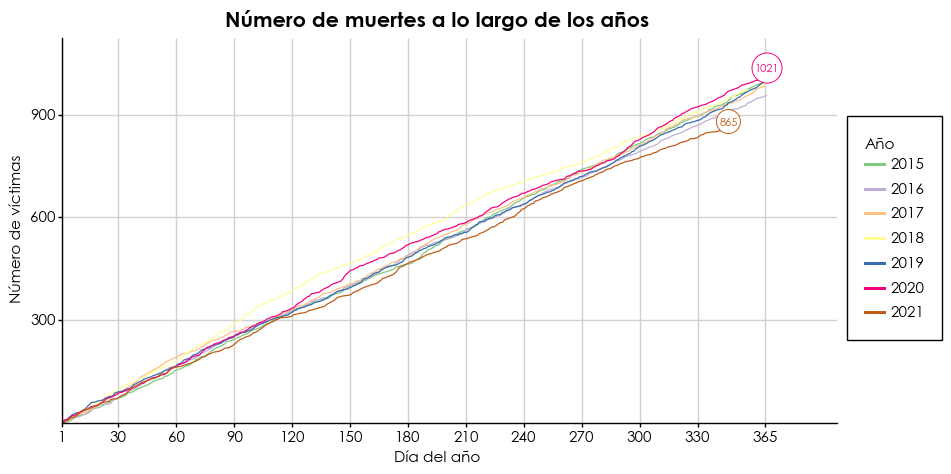

<ggplot: (128356338288)>

In [20]:
shootings_aux_5 = shootings
shootings_counts_5 = shootings_aux_5.groupby(['date_day', 'date_year'], observed=True)['id'].count()
shootings_counts_5 = shootings_counts_5.reset_index(name='counts')
shootings_counts_5 = (shootings_counts_5.groupby(['date_day','date_year'], observed=True)['counts'].sum()
                    .groupby(['date_year']).cumsum())
shootings_counts_5 = shootings_counts_5.reset_index(name='cumsum')
max_day_2021 = shootings_counts_5[(shootings_counts_5['date_year'] == 2021)]['date_day'].max()
shootings_counts_365 = shootings_counts_5[
                                        ((shootings_counts_5['date_day'] == 366) & 
                                        (shootings_counts_5['date_year'] == 2020))
                                        |
                                        ((shootings_counts_5['date_day'] == max_day_2021) & 
                                        (shootings_counts_5['date_year'] == 2021))
                                       ]

(ggplot(shootings_counts_5, 
        aes(x = 'date_day', y = 'cumsum'))
 
 + geom_line(aes(color = 'date_year'))
 
 + geom_label(shootings_counts_365, 
              aes(label='cumsum', x = 'date_day', y = 'cumsum', color = 'date_year'), 
              size=8, 
              va='bottom', 
              show_legend = False,
              boxstyle='circle' )
 
 + scale_x_continuous(breaks = np.concatenate([[1], np.arange(30, 331, 30), [365]]), expand=(0, 0, 0.1, 0))
 + scale_y_continuous(expand=(0, 0, 0.1, 0))
 
 + ggtitle("Número de muertes a lo largo de los años")
 + xlab("Día del año")
 + ylab("Número de víctimas")
 
 + guides(color = guide_legend(title="Año"))
 + scale_color_brewer(type='qual', palette = 'Accent')
 + theme(
    figure_size = (10,5),
    panel_background=element_blank(),
     
    axis_text_x=element_text(colour="black"),
    axis_text_y=element_text(colour="black"),
    axis_line_x=element_line(size=1, colour="black"),
    axis_line_y=element_line(size=1, colour="black"),
     
    panel_grid_major=element_line(colour="#d1d1d1"),
    panel_grid_minor=element_blank(),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11)
 )
)

Por último, relacionemos las víctimas con signos de enfermedad mental y aquellos que portaban armas en el momento de su muerte.
Podemos ver, claramente como la inmesa mayoría de las víctimas no portaban armas y prácticamente el porcentaje de víctimas con signos de enfermedades mentales únicamente ronda el 25%.

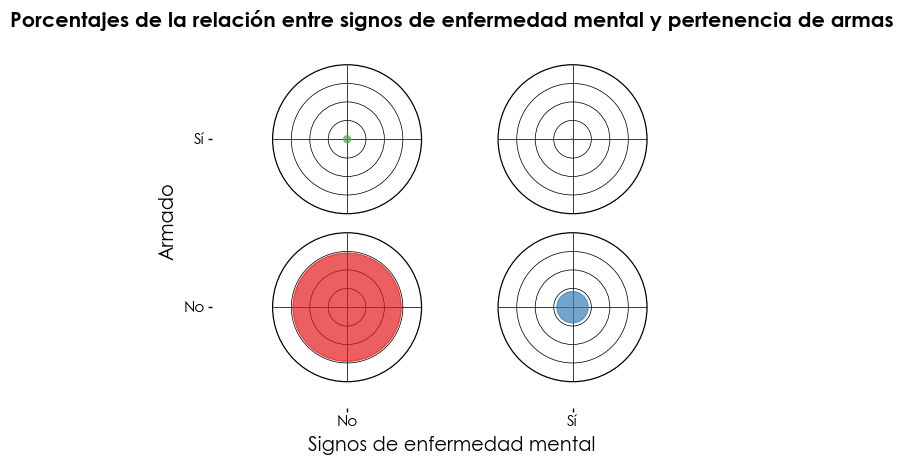

<ggplot: (128356659116)>

In [21]:
shootings_percent = (shootings.groupby(['armed_boolean','signs_of_mental_illness'])['id'].count() 
                    / shootings['id'].count())
shootings_percent = shootings_percent.reset_index(name='percent')
shootings_percent['aux'] = (shootings_percent['armed_boolean'].astype('str') + 
                     shootings_percent['signs_of_mental_illness'].astype('str'))
max_percent = shootings_percent['percent'].max()

(ggplot(shootings_percent, aes(x='signs_of_mental_illness', y='armed_boolean'))
 + geom_point(size = 60, fill='white', color = 'black')
 + geom_point(size = 45, fill='white', color = 'black', stroke = 0.3)
 + geom_point(size = 30, fill='white', color = 'black', stroke = 0.3)
 + geom_point(size = 15, fill='white', color = 'black', stroke = 0.3)
 + geom_point(shape = '+', size = 60, fill='black', stroke = 0.3)
 + geom_point(aes(size = 'percent', color = 'aux'), 
              alpha=0.7)
 + scale_size_radius(range = (0,max_percent*60)
                    )
 + ggtitle("Porcentajes de la relación entre signos de enfermedad mental y pertenencia de armas")
 + xlab("Signos de enfermedad mental")
 + ylab("Armado")
 + guides(size = None,
          color = None)
 + scale_x_discrete(labels=['No', 'Sí'])
 + scale_y_discrete(labels=['No', 'Sí'])
 + scale_color_brewer(type='qual', palette = 'Set1')
 + theme(
     
    panel_background=element_blank(),
     
    legend_key = element_blank(),
    legend_background = element_rect(color='black'),
    
    plot_title=element_text(size=15, face='bold'),
    text=element_text(family='Century Gothic', size=11),
    axis_title = element_text(size=14),
    axis_text_x=element_text(colour="black"),
    axis_text_y=element_text(colour="black"),
    
    strip_background = element_blank(),
    strip_text = element_text(size=10, face="bold")
 )
)